### Importing Library

In [1]:
# Basic eda library
import pyforest #include all major lib ---> pandas, seaborn, matplotlib, seaborn

# data prerocessing library
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# train test split
from sklearn.model_selection import train_test_split

# Feature selection
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest

# Machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Metrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# To hide or filtering Warning for clear view
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

### Customising Visulization

In [2]:
sns.set(rc = {'figure.figsize':(16,5)})
sns.set_style('whitegrid')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Importing and reading the data

In [3]:
df = pd.read_excel('Data_Train.xlsx')
df.head()

<IPython.core.display.Javascript object>

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_test =  pd.read_excel('Test_set.xlsx')
df_test.head()

<IPython.core.display.Javascript object>

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


#### Our data is imported so let us check the details

## Exploratory data analysis

Let's check the shape of data

In [5]:
print(' train data shape -->', df.shape)
print(' test data shape -->', df_test.shape)

 train data shape --> (10683, 11)
 test data shape --> (2671, 10)


let's view the data 

### Missing value treatment

<IPython.core.display.Javascript object>

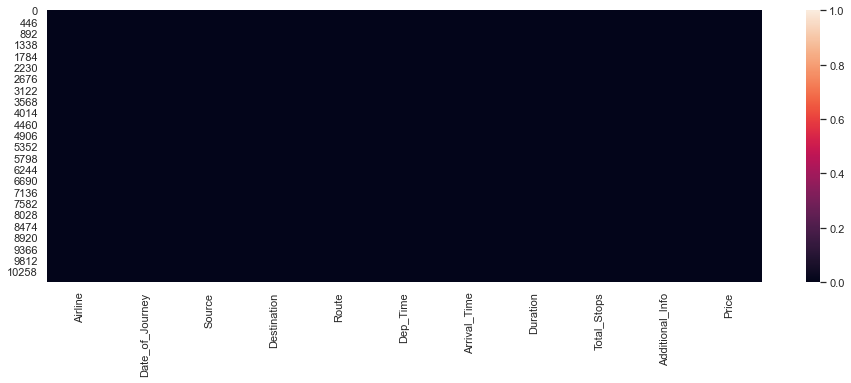

In [6]:
sns.heatmap(df.isnull())

<IPython.core.display.Javascript object>

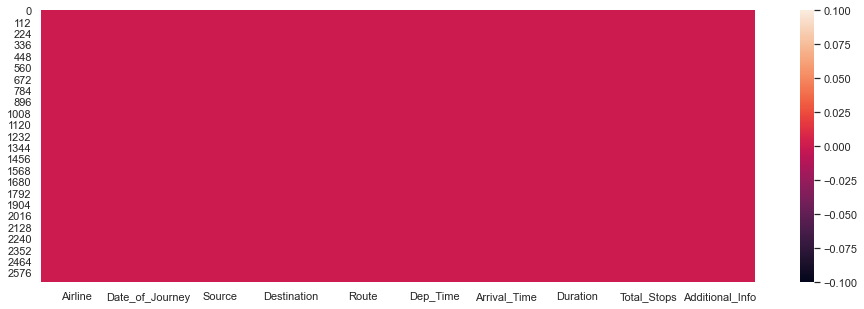

In [7]:
sns.heatmap(df_test.isnull())

so, we can see that our data has no null value

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

so , as the data set has only one value left so we are droping that value

In [10]:
df.dropna(inplace= True)

In [11]:
print('data', df.dtypes)
print('----------------')
print('test data', df_test.dtypes)

data Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object
----------------
test data Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object


### Converting to Date time 

from data type info we can see the date column is in object so first change date columns into date time and take some imp outcome

In [12]:
def change_datetime(column):
    df[column] = pd.to_datetime(df[column])

Date_of_Journey, Dep_Time, Arrival_Time these column need to be change

In [13]:
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_datetime(i)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
print('data', df.dtypes)

data Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object


so our work is done lets do the same for test data

In [15]:
def to_datetime(column):
    df_test[column] = pd.to_datetime(df_test[column])

In [16]:
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    to_datetime(i)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
print('test data', df_test.dtypes)

test data Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object


so our work is completed for both test and train data set

In [18]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-03-11 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-03-11 05:50:00,2021-03-11 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-03-11 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-03-11 18:05:00,2021-03-11 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-03-11 16:50:00,2021-03-11 21:35:00,4h 45m,1 stop,No info,13302


Now, we have changed our date column into date-time format so we can use datetime function and extract day and month from the data 

In [19]:
df['Date_of_Journey']

0       2019-03-24
1       2019-01-05
2       2019-09-06
3       2019-12-05
4       2019-01-03
           ...    
10678   2019-09-04
10679   2019-04-27
10680   2019-04-27
10681   2019-01-03
10682   2019-09-05
Name: Date_of_Journey, Length: 10682, dtype: datetime64[ns]

let us collect day and month using pandas date and time 

In [20]:
df['Journey_day'] = df['Date_of_Journey'].dt.day
df['Journey_month'] = df['Date_of_Journey'].dt.month

In [21]:
print(' day of Jorney ', df['Journey_day'])
print('-------------------------------------------------------------------')
print(' month of Jorney ', df['Journey_month'])

 day of Jorney  0        24
1         5
2         6
3         5
4         3
         ..
10678     4
10679    27
10680    27
10681     3
10682     5
Name: Journey_day, Length: 10682, dtype: int64
-------------------------------------------------------------------
 month of Jorney  0         3
1         1
2         9
3        12
4         1
         ..
10678     9
10679     4
10680     4
10681     1
10682     9
Name: Journey_month, Length: 10682, dtype: int64


### Adding Columns

so we have extracted the day and month from the Date_of_journey column so we can do same for Arrival and departure

In [22]:
# to extract hour 
def extract_hour(df, col):
    df[col + '_hour'] = df[col].dt.hour
    
# to extract minute
def extract_minute(df, col):
    df[col + '_minute'] = df[col].dt.minute

so our function to extract hour and minute is ready so let us pass the column

In [23]:
extract_hour(df, 'Arrival_Time')
extract_minute(df, 'Arrival_Time')

In [24]:
extract_hour(df, 'Dep_Time')
extract_minute(df, 'Dep_Time')

so our work of extraction of hour and minute from arrival time and departure time is done .<br>
so, let us view the data

In [25]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-03-11 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-03-11 05:50:00,2021-03-11 13:15:00,7h 25m,2 stops,No info,7662,5,1,13,15,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-03-11 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,4,25,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-03-11 18:05:00,2021-03-11 23:30:00,5h 25m,1 stop,No info,6218,5,12,23,30,18,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-03-11 16:50:00,2021-03-11 21:35:00,4h 45m,1 stop,No info,13302,3,1,21,35,16,50


In [26]:
df.shape

(10682, 17)

so we can observe that the orignal column of arrival, date of journey, departure we dont need as we have our own customise data.
so lets us see Duration column

In [27]:
df['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

as we can see that the data doesnt seem to be same so we need to add hour and minute where missing

In [28]:
duration = list(df['Duration'])

In [29]:
for i in range(len(duration)):
    if len(duration[i].split()) == 2:
        pass
    else :
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i]='0h '+ duration[i] 

In [30]:
df['Duration'] = duration

In [31]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-03-11 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-03-11 05:50:00,2021-03-11 13:15:00,7h 25m,2 stops,No info,7662,5,1,13,15,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-03-11 09:25:00,2021-06-10 04:25:00,19h 0m,2 stops,No info,13882,6,9,4,25,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-03-11 18:05:00,2021-03-11 23:30:00,5h 25m,1 stop,No info,6218,5,12,23,30,18,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-03-11 16:50:00,2021-03-11 21:35:00,4h 45m,1 stop,No info,13302,3,1,21,35,16,50


Now, our Duration column  is ready to split

In [32]:
def hours(x):
    return x.split(' ')[0][0:-1]

In [33]:
def minute(x):
    return x.split()[1][0:-1]

In [34]:
df['Duration_hours'] = df['Duration'].apply(hours)
df['Duration_mins']=df['Duration'].apply(minute)

In [35]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-03-11 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-03-11 05:50:00,2021-03-11 13:15:00,7h 25m,2 stops,No info,7662,5,1,13,15,5,50,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-03-11 09:25:00,2021-06-10 04:25:00,19h 0m,2 stops,No info,13882,6,9,4,25,9,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-03-11 18:05:00,2021-03-11 23:30:00,5h 25m,1 stop,No info,6218,5,12,23,30,18,5,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-03-11 16:50:00,2021-03-11 21:35:00,4h 45m,1 stop,No info,13302,3,1,21,35,16,50,4,45


In [36]:
df.shape

(10682, 19)

so as we are done with the date time column abd ecxtracted thr meaningfull data so we can drop those unneedrd column

### Dropping Column

In [37]:
def drop_column(df, col):
    df.drop(col, axis = 1, inplace = True)


In [38]:
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration']:
    drop_column(df, i)

In [39]:
df.shape

(10682, 15)

In [40]:
df.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Duration_hours         object
Duration_mins          object
dtype: object

so let's change the data type of Duration minute and hours column

In [41]:
df['Duration_hours'] = df['Duration_hours'].astype('int64')
df['Duration_mins'] = df['Duration_mins'].astype('int64')

In [42]:
df.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Duration_hours          int64
Duration_mins           int64
dtype: object

In [43]:
continous_col = [col for col in df.keys() if df[col].dtype !='O']
continous_col

['Price',
 'Journey_day',
 'Journey_month',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Duration_hours',
 'Duration_mins']

so , we are all set for date time lets go for object and cateegorical feature

In [44]:
obj_col = [col for col in df.keys() if df[col].dtype=='O']
obj_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [45]:
object_data = df[obj_col]
object_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [46]:
object_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

## Bivariate Analysis

In [47]:
len(object_data['Airline'].unique())

12

#### Airline v/s Prize

<IPython.core.display.Javascript object>

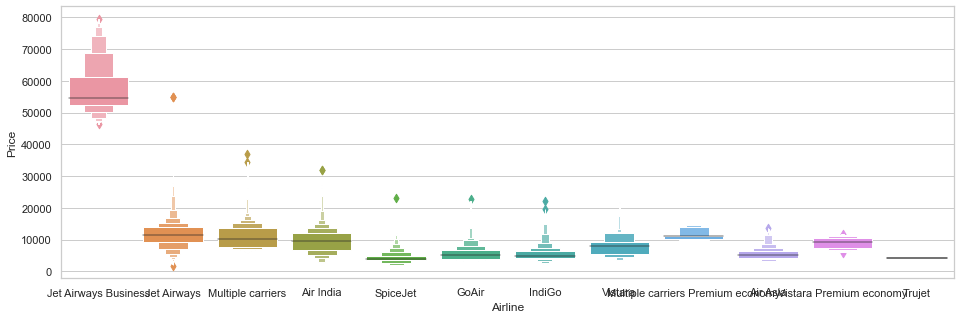

In [48]:
sns.boxenplot(y='Price',x='Airline',data=df.sort_values('Price',ascending=False))

so in above plot we can see the price jet airways buisness is very high and median price of other airways is near to each other 

### Total stops v/s Price

<IPython.core.display.Javascript object>

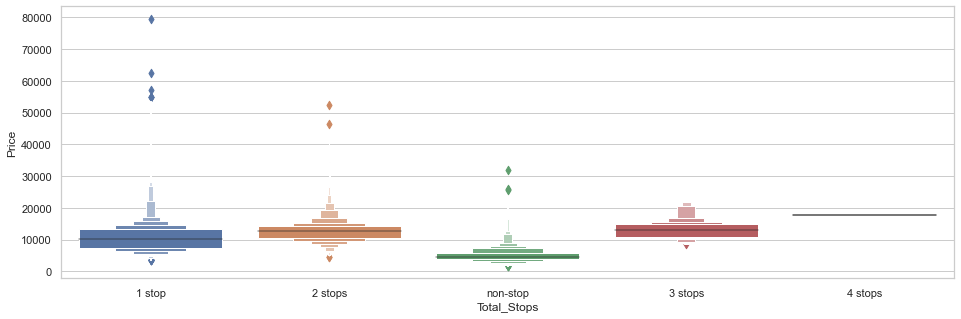

In [49]:
sns.boxenplot(y='Price', x = 'Total_Stops', data=df.sort_values('Price',ascending=False))

### Prize v/s  Source

<IPython.core.display.Javascript object>

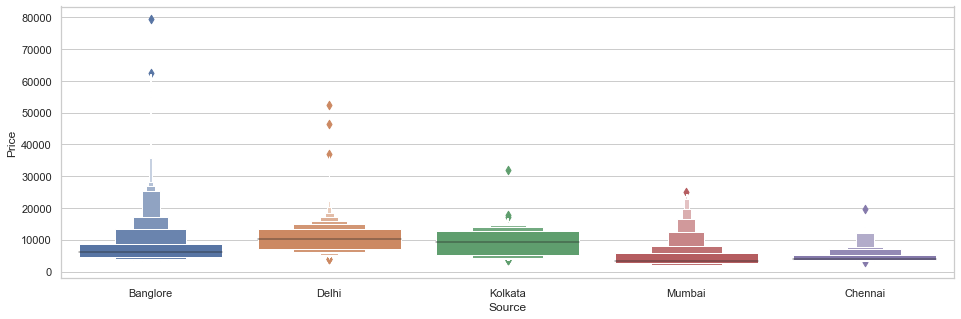

In [50]:
sns.boxenplot(y='Price', x = 'Source', data=df.sort_values('Price',ascending=False))

### Price v/s Destination

<IPython.core.display.Javascript object>

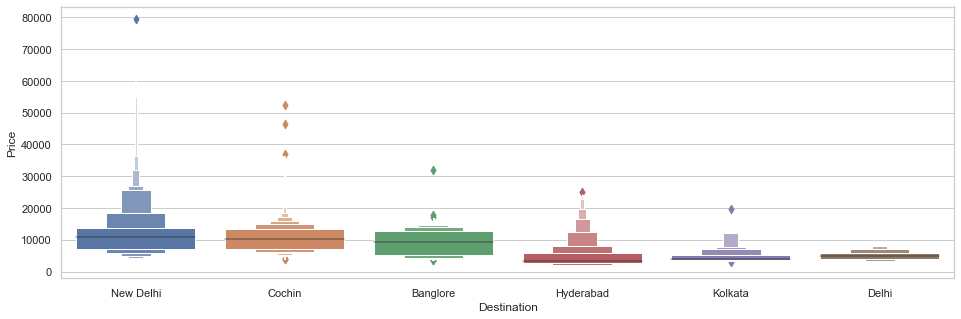

In [51]:
sns.boxenplot(y='Price', x = 'Destination', data=df.sort_values('Price',ascending=False))

In [52]:
object_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [53]:
object_data['Route_1']=object_data['Route'].str.split('→').str[0]
object_data['Route_2']=object_data['Route'].str.split('→').str[1]
object_data['Route_3']=object_data['Route'].str.split('→').str[2]
object_data['Route_4']=object_data['Route'].str.split('→').str[3]
object_data['Route_5']=object_data['Route'].str.split('→').str[4]

In [54]:
object_data['Route_1'].fillna('None',inplace=True)
object_data['Route_2'].fillna('None',inplace=True)
object_data['Route_3'].fillna('None',inplace=True)
object_data['Route_4'].fillna('None',inplace=True)
object_data['Route_5'].fillna('None',inplace=True)

In [55]:
object_data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,None,None
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,CCU,BLR,None,None,None
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,CCU,BLR,None,None,None
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,BLR,DEL,None,None,None
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,None,None,None


so let us change the categorical feature to continous using label encoder

## Label Encoder

In [56]:
# Intiallising Encoder
encoder = LabelEncoder()

In [57]:
obj_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [58]:
Airlines = encoder.fit_transform(object_data['Airline'])
Source = encoder.fit_transform(object_data['Source'])
Destination = encoder.fit_transform(object_data['Destination'])
Total_Stops = encoder.fit_transform(object_data['Total_Stops'])
Additional_Info = encoder.fit_transform(object_data['Additional_Info'])

In [59]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    df[i] = encoder.fit_transform(object_data[i])

so we have changed so lets go an fit it into its original column or train dataset

In [60]:
df['Airline'] = Airlines
df['Source'] = Source
df['Destination'] = Destination
df['Total_Stops'] = Total_Stops
df['Additional_Info'] = Additional_Info

In [61]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,BLR → DEL,4,8,3897,24,3,1,10,22,20,2,50,0,13,29,13,5
1,1,3,0,CCU → IXR → BBI → BLR,1,8,7662,5,1,13,15,5,50,7,25,2,25,1,3,5
2,4,2,1,DEL → LKO → BOM → COK,1,8,13882,6,9,4,25,9,25,19,0,3,32,4,5,5
3,3,3,0,CCU → NAG → BLR,0,8,6218,5,12,23,30,18,5,5,25,2,34,3,13,5
4,3,0,5,BLR → NAG → DEL,0,8,13302,3,1,21,35,16,50,4,45,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,CCU → BLR,4,8,4107,4,9,22,25,19,55,2,30,2,5,29,13,5
10679,1,3,0,CCU → BLR,4,8,4145,27,4,23,20,20,45,2,35,2,5,29,13,5
10680,4,0,2,BLR → DEL,4,8,7229,27,4,11,20,8,20,3,0,0,13,29,13,5
10681,10,0,5,BLR → DEL,4,8,12648,3,1,14,10,11,30,2,40,0,13,29,13,5


In [62]:
df.dtypes

Airline                 int32
Source                  int32
Destination             int32
Route                  object
Total_Stops             int32
Additional_Info         int32
Price                   int64
Journey_day             int64
Journey_month           int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Duration_hours          int64
Duration_mins           int64
Route_1                 int32
Route_2                 int32
Route_3                 int32
Route_4                 int32
Route_5                 int32
dtype: object

so as we we added the route now we can drop orignal route column using drop fumction

In [63]:
df.drop('Route', axis=1, inplace=True)

In [64]:
df.dtypes

Airline                int32
Source                 int32
Destination            int32
Total_Stops            int32
Additional_Info        int32
Price                  int64
Journey_day            int64
Journey_month          int64
Arrival_Time_hour      int64
Arrival_Time_minute    int64
Dep_Time_hour          int64
Dep_Time_minute        int64
Duration_hours         int64
Duration_mins          int64
Route_1                int32
Route_2                int32
Route_3                int32
Route_4                int32
Route_5                int32
dtype: object

now, our data is cleaned we have succesfully changed all the categorical value, take all usefully insight, drop unnecessary column.

## Outlier Detection 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

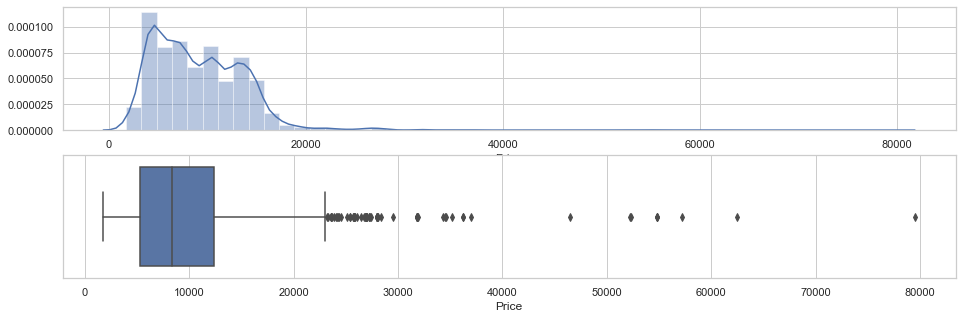

In [65]:
plt.subplot(211)
sns.distplot(df['Price'])
plt.subplot(212)
sns.boxplot(df['Price'])

so from box plot we can observe that the outlier are having a cluster till 40000 so we can replace the value with median which is greater than 40000

### Outlier removal

In [66]:
df['Price'].describe()

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [67]:
# q1 = df['Price'].quantile(.25)
# q3 = df['Price'].quantile(.75)
# IQR =q3 - q1
# IQR
# Upper_limit = q3 + 1.5*IQR
# Upper_limit

In [68]:
# print(df['Price'].mean())
# print(df['Price'].std())
# upper_limit = df['Price'].mean() + 5*df['Price'].std()
# upper_limit

In [69]:
df['Price'] = np.where(df['Price'] > 40000, df['Price'].median(),df['Price'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

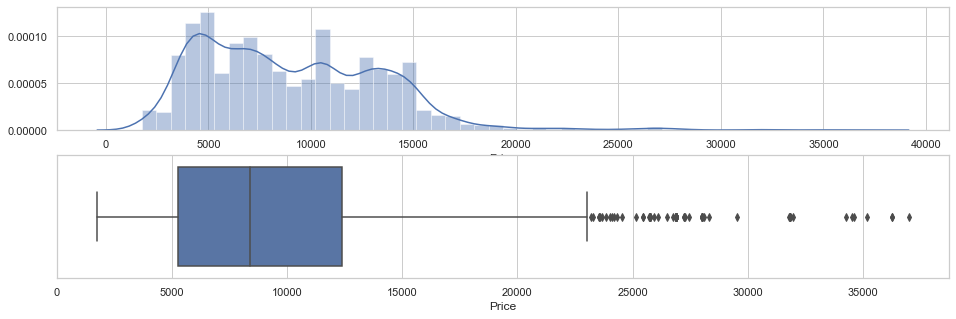

In [70]:
plt.subplot(211)
sns.distplot(df['Price'])
plt.subplot(212)
sns.boxplot(df['Price'])

so now , we can observe that there are very less outlier and we have replace the outlier from its median
 -  so number of otlier are less

In [71]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,4,8,3897.0,24,3,1,10,22,20,2,50,0,13,29,13,5
1,1,3,0,1,8,7662.0,5,1,13,15,5,50,7,25,2,25,1,3,5
2,4,2,1,1,8,13882.0,6,9,4,25,9,25,19,0,3,32,4,5,5
3,3,3,0,0,8,6218.0,5,12,23,30,18,5,5,25,2,34,3,13,5
4,3,0,5,0,8,13302.0,3,1,21,35,16,50,4,45,0,34,8,13,5


### Correlation Matrix

now, let us check the correlation of data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

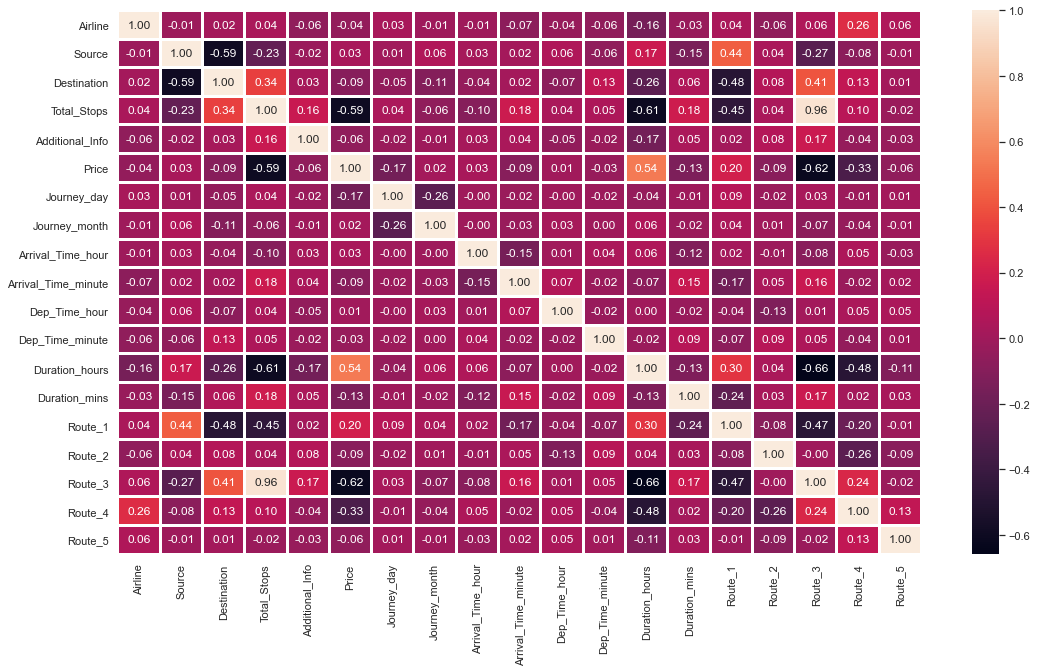

In [72]:
sns.set(rc = {'figure.figsize':(18,10)})
sns.heatmap(df.corr(), annot=True, linewidth=2, fmt='.2f')

In [73]:
df_feature = df.copy()

## Now let us check the relation

In [74]:
X= df_feature.drop('Price',axis=1)
y= df_feature['Price']

## VarianceThreshold

In [75]:
sel_variance_threshold = VarianceThreshold() 
X_remove_variance = sel_variance_threshold.fit_transform(X)
print(X_remove_variance.shape)

(10682, 18)


so our data has no zero-variance feature so let us check another library

## mutual_info_classif

In [76]:
mutual_info_classif(X,y)
imp=pd.DataFrame(mutual_info_classif(X, y),index=X.columns)
imp

<IPython.core.display.Javascript object>

,0
Airline,2.595647
Source,2.383054
Destination,2.437834
Total_Stops,1.528340
Additional_Info,2.168727
Journey_day,1.094074
Journey_month,0.859839
Arrival_Time_hour,1.835192
Arrival_Time_minute,1.518073
Dep_Time_hour,1.406066


so, we can see only route_5 have very less importance in the analysis so we can drop this column

In [77]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [78]:
y = np.array(y)
y = y.reshape(-1, 1)
y

<IPython.core.display.Javascript object>

array([[ 3897.],
       [ 7662.],
       [13882.],
       ...,
       [ 7229.],
       [12648.],
       [11753.]])

## Standard Scaler

In [79]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y= scaler.fit_transform(y)

In [80]:
df_feature.shape

(10682, 19)

In [81]:
X.shape

(10682, 18)

## Train test split of train dataset 

In [82]:
X= df.drop(['Price', 'Route_5'],axis=1)
y= df['Price']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =101)

In [84]:
X_train.shape

(7477, 17)

In [85]:
y_train.shape

(7477,)

our data is ready for the machine learning

## Machine Learning Algorithm

In [86]:
algo = [LinearRegression(),
        DecisionTreeRegressor(max_depth=10, min_samples_split=2),
        RandomForestRegressor(n_estimators=100)]

In [87]:
def predict(reg_model, X_train, y_train, X_test):
    model = reg_model.fit(X_train, y_train)
    print(f'{i}\n')
    print(f'Training_score : {model.score(X_train, y_train)}')
    y_pred = reg_model.predict(X_test)
    print(f'prediction of model are : {y_pred}')
    r2_Score=r2_score(y_test,y_pred)
    print(f'r2 score of reg_ model --> {r2_Score}')
    print('MSE:',mean_squared_error(y_test,y_pred))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('------------------------------------------------------------------------------------------------------------')

In [88]:
for i in algo:
    predict(i,  X_train, y_train, X_test)

LinearRegression()

Training_score : 0.5200054242896839
prediction of model are : [ 5191.87089354  6411.74981397 11301.03792521 ... 11335.2072396
  9880.3532294  11770.87157831]
r2 score of reg_ model --> 0.5304129655808074
MSE: 8837731.668022387


<IPython.core.display.Javascript object>

RMSE: 2972.832263687675
------------------------------------------------------------------------------------------------------------
DecisionTreeRegressor(max_depth=10)

Training_score : 0.929432509021525
prediction of model are : [ 3882.71186441 11982.         13999.66666667 ... 16558.94117647
 12669.41176471 16558.94117647]
r2 score of reg_ model --> 0.8755991120473265
MSE: 2341252.177776295


<IPython.core.display.Javascript object>

RMSE: 1530.1150864481715
------------------------------------------------------------------------------------------------------------
RandomForestRegressor()

Training_score : 0.9833472781674575
prediction of model are : [ 3849.72 11982.   11205.6  ... 16392.38 12402.5  15151.17]
r2 score of reg_ model --> 0.9165393328673025
MSE: 1570748.1827414972


<IPython.core.display.Javascript object>

RMSE: 1253.2949304698784
------------------------------------------------------------------------------------------------------------


##### So, we can easily see that the accuracy score of Random Forest Classifier is high  --> 91 % on test Data so we can move further with Random Forest Classifier 